In [1]:
import seaborn as sns
import pandas as pd
import pickle
from scipy.stats import spearmanr, pearsonr, kendalltau

In [9]:
import os

def generate_stat(metric):
    df = pd.DataFrame()
    for traj_len in [5, 15, 30]: #, 15, 30]:
        for file in os.listdir('.'):
            if file.endswith('-' + str(traj_len) + '-density-r-Nth.pkl'):
                print(file)
                with open('./' + file, 'rb') as f:
                    unpickler = pickle.Unpickler(f)
                    dict_res = unpickler.load()
                    nrs = dict_res['nrs']
                    fr = dict_res['fr']

                    for j, metric_name in enumerate(['MME', 'MPV', 'OMME', 'OMPV']):
                        pd_dict = {}
                        pd_dict['Correlation coefficient'] = metric(fr, nrs[j])[0]
                        pd_dict['Poses'] = str(traj_len)
                        pd_dict['Metric name'] = metric_name
                        df = df.append(pd_dict, ignore_index=True)
                        
    return df

800-30-5-density-r-Nth.pkl
800-10-5-density-r-Nth.pkl
1500-50-5-density-r-Nth.pkl
800-50-5-density-r-Nth.pkl
1500-70-5-density-r-Nth.pkl
1000-70-5-density-r-Nth.pkl
1500-130-5-density-r-Nth.pkl
800-30-15-density-r-Nth.pkl
1500-130-15-density-r-Nth.pkl
1000-70-15-density-r-Nth.pkl
800-50-15-density-r-Nth.pkl
1500-50-15-density-r-Nth.pkl
1500-70-15-density-r-Nth.pkl
800-10-15-density-r-Nth.pkl
800-30-30-density-r-Nth.pkl
800-50-30-density-r-Nth.pkl
1000-70-30-density-r-Nth.pkl
800-10-30-density-r-Nth.pkl
1500-70-30-density-r-Nth.pkl
1500-130-30-density-r-Nth.pkl
1500-50-30-density-r-Nth.pkl


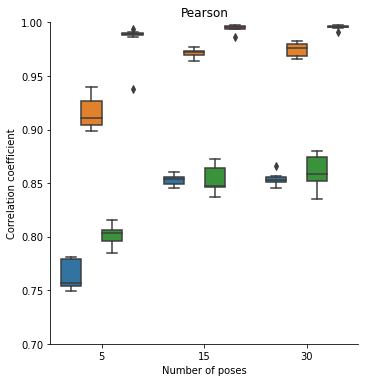

In [10]:
df = generate_stat(pearsonr)
g = sns.catplot(
    data=df, kind='box', x='Poses', y='Correlation coefficient', hue='Metric name')
g.set(ylim=(0.7, 1))
g.set(title='Pearson')
g.set(xlabel='Number of poses')
g._legend.remove()
# g.savefig('p2.pdf')

800-30-5-density-r-Nth.pkl
800-10-5-density-r-Nth.pkl
1500-50-5-density-r-Nth.pkl
800-50-5-density-r-Nth.pkl
1500-70-5-density-r-Nth.pkl
1000-70-5-density-r-Nth.pkl
1500-130-5-density-r-Nth.pkl
800-30-15-density-r-Nth.pkl
1500-130-15-density-r-Nth.pkl
1000-70-15-density-r-Nth.pkl
800-50-15-density-r-Nth.pkl
1500-50-15-density-r-Nth.pkl
1500-70-15-density-r-Nth.pkl
800-10-15-density-r-Nth.pkl
800-30-30-density-r-Nth.pkl
800-50-30-density-r-Nth.pkl
1000-70-30-density-r-Nth.pkl
800-10-30-density-r-Nth.pkl
1500-70-30-density-r-Nth.pkl
1500-130-30-density-r-Nth.pkl
1500-50-30-density-r-Nth.pkl


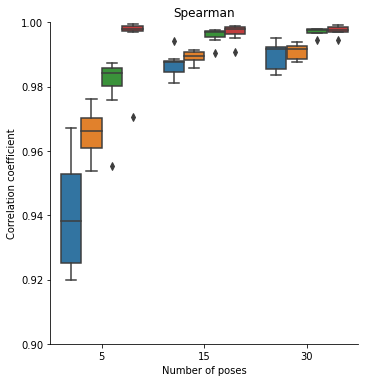

In [11]:
df = generate_stat(spearmanr)
g = sns.catplot(
    data=df, kind='box', x='Poses', y='Correlation coefficient', hue='Metric name', ci=95)
g.set(ylim=(0.9, 1))
g.set(title='Spearman')
g.set(xlabel='Number of poses')
g._legend.remove()
# g.savefig('s2.pdf')

800-30-5-density-r-Nth.pkl
800-10-5-density-r-Nth.pkl
1500-50-5-density-r-Nth.pkl
800-50-5-density-r-Nth.pkl
1500-70-5-density-r-Nth.pkl
1000-70-5-density-r-Nth.pkl
1500-130-5-density-r-Nth.pkl
800-30-15-density-r-Nth.pkl
1500-130-15-density-r-Nth.pkl
1000-70-15-density-r-Nth.pkl
800-50-15-density-r-Nth.pkl
1500-50-15-density-r-Nth.pkl
1500-70-15-density-r-Nth.pkl
800-10-15-density-r-Nth.pkl
800-30-30-density-r-Nth.pkl
800-50-30-density-r-Nth.pkl
1000-70-30-density-r-Nth.pkl
800-10-30-density-r-Nth.pkl
1500-70-30-density-r-Nth.pkl
1500-130-30-density-r-Nth.pkl
1500-50-30-density-r-Nth.pkl


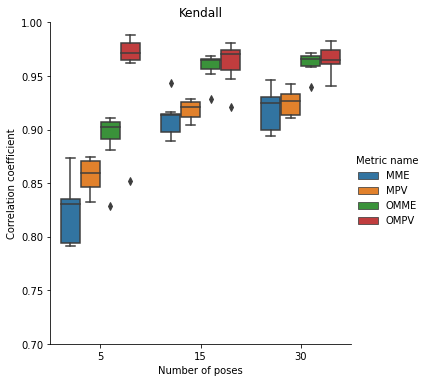

In [12]:
df = generate_stat(kendalltau)
g = sns.catplot(
    data=df, kind='box', x='Poses', y='Correlation coefficient', hue='Metric name')
g.set(ylim=(0.7, 1))
g.set(title='Kendall')
g.set(xlabel='Number of poses')
# g._legend.remove()
# g.savefig('k2.pdf')